In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\91861\Desktop\Artifical Intelligence\Machine Leraning\13. K_MEANS_CLUSTERING\student_data.csv")
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


In [3]:
df.shape

(200, 2)

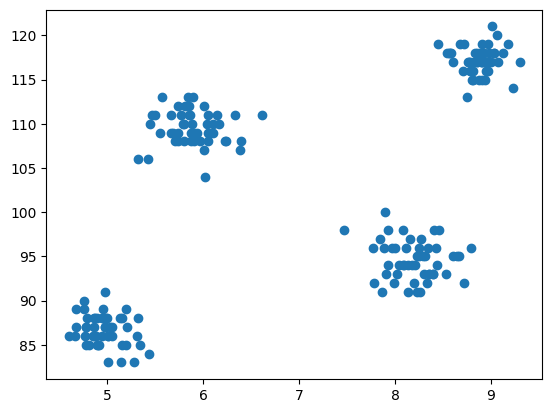

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['cgpa'],df['iq'])

In [5]:
from sklearn.cluster import KMeans

In [6]:
wcss=[]

for i in range(1,16):
    model=KMeans(n_clusters=i)
    model.fit_predict(df)
    wcss.append(model.inertia_)
    

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [7]:
wcss

[29957.898288,
 4184.14127,
 2364.0055834200834,
 681.96966,
 523.7131894763966,
 388.85240268759816,
 302.5473746759042,
 266.19063497571153,
 274.63344155014704,
 173.0704010967672,
 166.85831339197802,
 132.23205098729346,
 147.11588076814246,
 118.23620712606679,
 88.04298868175846]

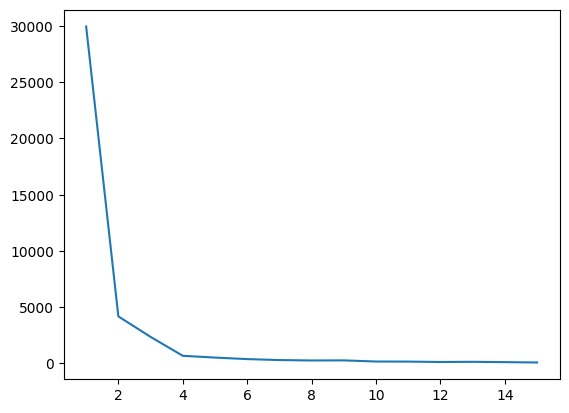

In [8]:
plt.plot(range(1,16),wcss)

In [9]:
X = df.iloc[:,:].values
km = KMeans(n_clusters=4)
y_means = km.fit_predict(X)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
y_means

array([3, 0, 1, 1, 0, 0, 1, 2, 0, 1, 3, 0, 1, 3, 0, 1, 0, 1, 0, 0, 1, 3,
       1, 3, 3, 1, 3, 2, 1, 0, 2, 0, 2, 0, 1, 1, 2, 0, 3, 0, 3, 1, 1, 3,
       2, 2, 1, 0, 2, 0, 3, 3, 2, 1, 2, 0, 0, 2, 0, 2, 0, 1, 1, 2, 3, 2,
       1, 3, 0, 1, 0, 2, 1, 3, 0, 2, 0, 2, 3, 1, 1, 2, 0, 3, 2, 3, 2, 0,
       2, 0, 2, 2, 1, 3, 1, 1, 2, 1, 3, 2, 0, 3, 3, 2, 3, 3, 1, 3, 2, 2,
       1, 2, 0, 0, 1, 2, 1, 0, 2, 3, 3, 0, 1, 2, 1, 3, 1, 0, 3, 1, 1, 0,
       3, 3, 0, 2, 0, 3, 1, 1, 1, 3, 0, 3, 3, 2, 3, 2, 0, 3, 2, 3, 2, 2,
       3, 1, 0, 2, 0, 1, 3, 2, 0, 1, 2, 3, 0, 3, 3, 2, 2, 0, 2, 3, 3, 1,
       2, 0, 3, 2, 2, 0, 0, 0, 1, 3, 1, 1, 2, 0, 1, 1, 3, 3, 1, 3, 2, 0,
       0, 2])

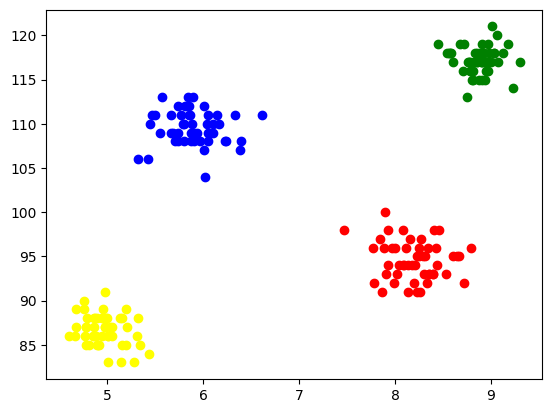

In [11]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

In [12]:
# -----------------------------------------------------------------------------------------------------------------

In [13]:
# -----------------------------------------------------------------------------------------------------------------

In [14]:
# Silhouette Coefficient

In [15]:
# a(cohesion): The mean distance between a sample and all other points in the same cluster.
# b(separation): The mean distance between a sample and all other points in the next nearest cluster.

In [16]:
# 𝑠 = (𝑏−𝑎) / (max(𝑏,𝑎))                      (0 to 1)

In [17]:
# The score is higher when clusters are dense and well separated

In [18]:
#      a(i) << b(i)	Correctly clustered   (i means for a sample)
#      a(i) ≈ b(i)	Border point
#      a(i) > b(i)	Wrong cluster

In [19]:
#                   Value	       Meaning
#                    +1	       Perfect clustering
#                    ≈ 0.5	   Good clustering
#                    ≈ 0	   Overlapping clusters
#                    < 0	   Likely misclassified

In [20]:
#  NOTE : we calculate "Silhouette Coefficient" for a sample or for entire data (mean of smaples) to comapre with k other values.

In [21]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, y_means)

In [22]:
score = silhouette_score(X, y_means)

In [23]:
score

0.7349682510969364

In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


#X_scaled = StandardScaler().fit_transform(X)

silhouette__scores = []

for k in range(2, 16):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette__scores.append(score)

print(silhouette__scores)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[0.7544965767963053, 0.7112751364478009, 0.7349682510969364, 0.6922288315496768, 0.6410948236088447, 0.5949151395259331, 0.5626302988232927, 0.565145444253958, 0.5665087296162703, 0.5584636666954522, 0.5646143724748911, 0.560006120796486, 0.5556808280876823, 0.5507252405841122]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


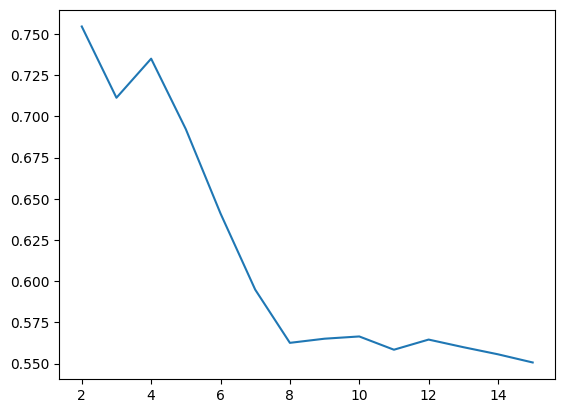

In [25]:
plt.plot(range(2,16),silhouette__scores)

In [26]:
# -----------------------------------------------------------------------------------------------------------------

In [27]:
# -----------------------------------------------------------------------------------------------------------------

In [28]:
# Dunn Index

In [1]:
# Dunn Index = ( minimum inter-cluster distance (Hint:border points) / maximum intra-cluster diameter​ ) 

In [30]:
# How to Read Dunn Values (Intuition)
#   High Dunn value means:
#   1.Clusters are far apart
#   2.Each cluster is tight
#   3.Worst-case cluster is still good

#   Low Dunn value means:
#   1.At least one cluster is too spread
#   2.Or two clusters are too close 
#   3.Or both

In [31]:
import numpy as np
from scipy.spatial.distance import pdist, cdist

def dunn_index(X, labels):
    clusters = np.unique(labels)
    
    # Intra-cluster distances
    intra_dists = []
    for c in clusters:
        points = X[labels == c]
        if len(points) > 1:
            intra_dists.append(np.max(pdist(points)))
    
    max_intra = np.max(intra_dists)
    
    # Inter-cluster distances
    inter_dists = []
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            points_i = X[labels == clusters[i]]
            points_j = X[labels == clusters[j]]
            inter_dists.append(np.min(cdist(points_i, points_j)))
    
    min_inter = np.min(inter_dists)
    
    return min_inter / max_intra


In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


#X_scaled = StandardScaler().fit_transform(X)

dunn = []

for k in range(2, 16):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    score = dunn_index(X, labels)
    dunn.append(score)

print(dunn)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[0.25605635479051114, 0.1349894693864755, 0.3162715739779841, 0.11099467437495192, 0.11097803058293448, 0.14278664114580464, 0.1659196360112643, 0.1659196360112643, 0.19766976689857776, 0.2492998274721141, 0.2492998274721141, 0.32508680976886, 0.3308267085833367, 0.3308267085833367]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


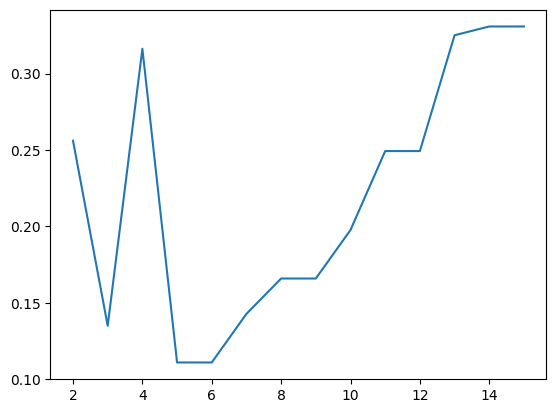

In [33]:
plt.plot(range(2,16),dunn)

In [34]:
# -------------------------------------------------------------------------------------------------------------------

In [35]:
# -------------------------------------------------------------------------------------------------------------------

In [36]:
# Rand Index :Rand Index is a measure of how similar clustering results or groupings are to the ground truth.

In [37]:
# 𝑅𝐼 =(𝐴+𝐵) / 2C𝑛

In [38]:
#   Let C denotes the ground truth class labeling and K be the clustering assignment.
#   A be the number of element pairs that lie in the same set of C and K,
#   B be the number of element pairs that lie in different sets of both C and K. 

In [39]:
#     RI Value	    Meaning
#     1.0	        Perfect match
#    ~0.8–0.9	    Very good
#    ~0.5	        Random agreement
#    < 0.5	        Poor agreement

In [40]:
# Dataset (6 points)
#       Ground truth (U):
#       A, B, C → Class 1
#       D, E, F → Class 2

#      Predicted clusters (V):
#      A, B, D → Cluster X
#      C, E, F → Cluster Y

In [41]:
#  2Cn=2C6=15
#   A = 4 (AE,AF,BE,BF)
#   B = 5 (AE,AF,BE,BF,CD)

#    RI = (4+5) / 15 = 0.47 ( not good )

In [42]:
from sklearn.metrics import rand_score

# Ground truth
y_true = [1,1,1,2,2,2]

# Predicted clusters
y_pred = [0,0,1,0,1,1]

ri = rand_score(y_true, y_pred)
print("Rand Index:", ri)



Rand Index: 0.4666666666666667


In [43]:
# -----------------------------------------------------------------------------------------------------------------

In [44]:
# -----------------------------------------------------------------------------------------------------------------

In [45]:
# Adjusted Rand Index (ARI) : The Adjusted Rand Index (ARI) is an external clustering validation metric.

In [46]:
# ARI Value Range   : −1 ≤ ARI ≤1

In [47]:
#        ARI Value	    Meaning
#       1.0	Perfect     clustering
#       0.6 – 0.9	    Very good
#       0.3 – 0.6	    Moderate
#       ≈ 0	            Random
#       < 0	            Worse than random

(-0.5, 858.5, 411.5, -0.5)

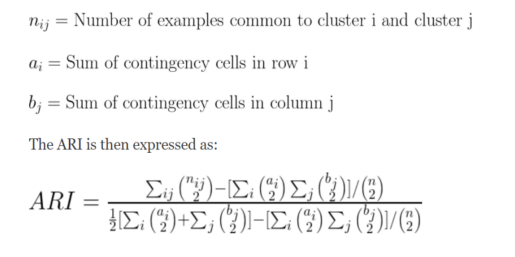

In [48]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(r"C:\Users\91861\Pictures\Screenshots\Screenshot 2025-12-28 010804.png")
plt.imshow(img)
plt.axis("off")

(-0.5, 1067.5, 542.5, -0.5)

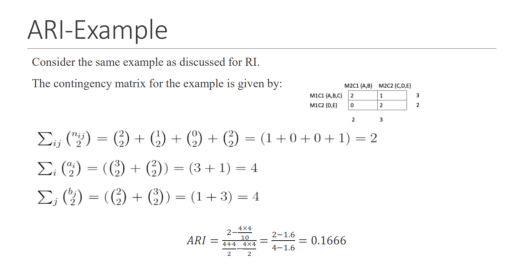

In [49]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(r"C:\Users\91861\Pictures\Screenshots\Screenshot 2025-12-28 011217.png")
plt.imshow(img)
plt.axis("off")

In [50]:
from sklearn.metrics import adjusted_rand_score

# Ground truth
y_true = [1,1,1,2,2,2]
# Predicted clusters
y_pred = [0,0,1,0,1,1]

ari = adjusted_rand_score(y_true, y_pred)
print("Rand Index:", ari)



Rand Index: -0.1111111111111111


In [51]:
# -----------------------------------------------------------------------------------------------------------

In [52]:
# -----------------------------------------------------------------------------------------------------------

In [53]:
# Purity : Purity is also an external evaluation criterion of cluster quality.


(-0.5, 1004.5, 277.5, -0.5)

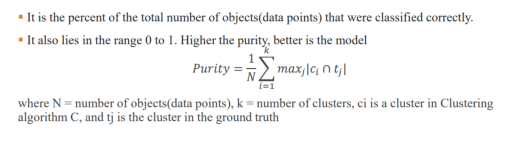

In [54]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(r"C:\Users\91861\Pictures\Screenshots\Screenshot 2025-12-28 011641.png")
plt.imshow(img)
plt.axis("off")

(-0.5, 1076.5, 479.5, -0.5)

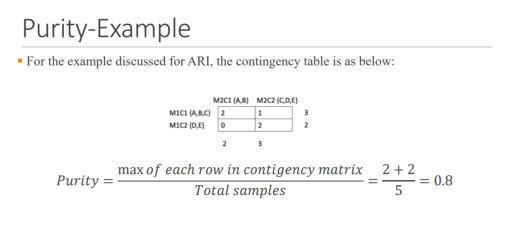

In [55]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(r"C:\Users\91861\Pictures\Screenshots\Screenshot 2025-12-28 011728.png")
plt.imshow(img)
plt.axis("off")

In [56]:
# -----------------------------------------------------------------------------------------------------------------

In [57]:
# -----------------------------------------------------------------------------------------------------------------

(-0.5, 908.5, 330.5, -0.5)

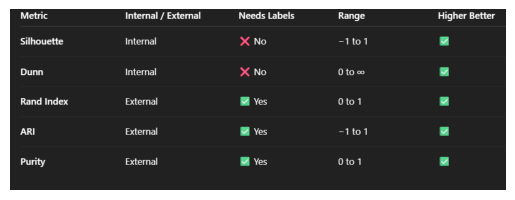

In [58]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open(r"C:\Users\91861\Pictures\Screenshots\Screenshot 2025-12-28 011930.png")
plt.imshow(img)
plt.axis("off")